# 로지스틱 회귀(Logistic Regerssion)
---

`로지스틱 회귀(Logistic Regression)` 모델은 다른 회귀 모델과는 다르게 **선형 회귀 방식을 분류에 적용**한 알고리즘입니다.

로지스틱 회귀는 독립변수가 아닌 가중치(weight) 변수가 선형인지 아닌지에 따라 회귀의 선형, 비선형을 결정합니다. 

또한 일반적인 회귀 모델과의 차이점은 오차제곱합(SSE)을 최소로 갖는 회귀선을 찾는 것이 아닌 **시그모이드(Sigmoid) 함수 최적선을 찾아 이 시그모이드 함수의 반환 값을 확률로 간주하여 분류**를 진행한다는 점입니다.

로지스틱 회귀는 이러한 특성을 이용해 텍스트 데이터를 이용한 감성분석(Sentiment Analysis)과 같은 분류 문제에 주로 사용됩니다.

로지스틱 회귀에 대한 추가적인 설명을 위해 이전에 진행했던 네이버 영화 리뷰의 감성 분석 데이터를 로드합니다.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [66]:
review_data = pd.read_csv('../../data/review.csv')
review_data.drop(review_data.columns[0], axis=1, inplace=True)
review_data.head()

,review,rate,target
0,"인생 최고의 영화였으며, 이걸 이제야 보았다는 것이 정말로 후회된다...모든 배우의...",10,1
1,어떻게 볼때 마다 눈물을 흘리냐...,10,1
2,너무너무 슬프다 ..ㅠㅠ,10,1
3,10번을넘게봤는데도슬프다..,10,1
4,언제봐도 눈물나게 슬퍼요ㅠㅠ,10,1


In [71]:
review_data.dropna(inplace=True)

위 데이터는 평점(rate)를 기준으로 target(감성)을 분류한 데이터입니다. 이 데이터의 target은 0과 1로 label이 존재하며 이는 긍정과 부정을 나타냅니다.

이처럼 범주형 변수를 이용해 회귀 모델을 생성한다면 아래와 같은 모양의 회귀선이 그려지고 각 데이터 포인트들은 2진 데이터인 target 값으로 인해 아래와 같은 모양을 보일 것입니다.

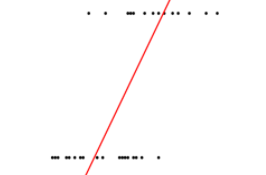

이미지 출처 : https://ratsgo.github.io/machine%20learning/2017/04/02/logistic/

이처럼 현재 target과 같은 범주형 데이터의 경우 0과 1이라는 숫자로 이루어져 있지만 그 숫자의 실제 의미는 부정과 긍정이므로 아무런 수치적 의미를 가지고 있지 않다는 것입니다.

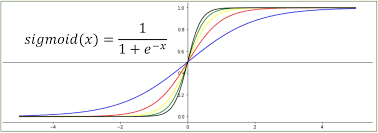

이미지 출처:  http://taewan.kim/post/sigmoid_diff/

따라서 S자 커브 형태의 시그모이드 함수를 이용해 모든 실수 입력 값을 0과 1사이의 미분 가능한 수로 변환하여 이를 확률로 이용해 더욱 정확한 분류를 진행하는 것이 바로 로지스틱 회귀입니다.

아래의 예시를 통해 실제 로지스틱 회귀를 이용해 어떻게 회귀 모델을 이용해 분류가 진행되는지 실습을 진행해보겠습니다.

# 로지스틱 회귀를 이용한 감성분류
---

In [72]:
review = review_data.review
target = review_data.target

In [73]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(review, target, test_size = 0.2, random_state=0)

In [74]:
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import TfidfVectorizer

twitter = Twitter()

tfv = TfidfVectorizer(tokenizer=twitter.morphs, ngram_range=(1,2), min_df=3, max_df = 0.9)
tfv.fit(train_x)

tfv_train_x = tfv.transform(train_x)
tfv_train_x

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


<3156x3934 sparse matrix of type '<class 'numpy.float64'>'
	with 51636 stored elements in Compressed Sparse Row format>

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(random_state=0)
params = {"C":[1,3,5,7,9]} # 규제 강도 설정
grid_cv = GridSearchCV(clf, param_grid=params, cv = 4, scoring='accuracy', verbose=1)
grid_cv.fit(tfv_train_x, train_y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished


GridSearchCV(cv=4, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 5, 7, 9]}, scoring='accuracy', verbose=1)

In [76]:
tfv_test_x = tfv.transform(test_x)
grid_cv.best_estimator_.score(tfv_test_x, test_y)

0.8555133079847909

In [77]:
r=["시간 아깝네요.","스토리 전개가 고구마 먹는 듯 답답","조연이 살렸네요","도무지 주제도 모르겠고 멀 전달하려는지 모르겠음","아무 생각없이 보면 재미있는 것 같기는 한데 추천하고 싶진 않네요.",
  "몰입도가 높은 영화입니다. 시간 가는 줄 몰랐네요.","곱씹을수록 잘 만들어진 영화인 것 같아요. 다시 볼 겁니다.","어이가 없네","평점 알바 왜이렇게 많냐",
  "일상의 고단함을 잊게 해주었던 인생영화"]
my_review = tfv.transform(r)
grid_cv.best_estimator_.predict(my_review)

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [83]:
for i, j in zip(r, grid_cv.best_estimator_.predict(my_review)):
    if j == 0:
        j = '부정'
    else:
        j = '긍정'
    print(i,':', j)

시간 아깝네요. : 부정
스토리 전개가 고구마 먹는 듯 답답 : 부정
조연이 살렸네요 : 긍정
도무지 주제도 모르겠고 멀 전달하려는지 모르겠음 : 긍정
아무 생각없이 보면 재미있는 것 같기는 한데 추천하고 싶진 않네요. : 긍정
몰입도가 높은 영화입니다. 시간 가는 줄 몰랐네요. : 긍정
곱씹을수록 잘 만들어진 영화인 것 같아요. 다시 볼 겁니다. : 긍정
어이가 없네 : 부정
평점 알바 왜이렇게 많냐 : 부정
일상의 고단함을 잊게 해주었던 인생영화 : 긍정


로지스틱 회귀 모델의 정확도는 약 0.855로 실제 새로운 데이터에 대해서 분류를 진행한 결과 2 데이터를 제외하고 나머지 8개 데이터에 대해 정확한 감성 분류를 진행한 것으로 파악됩니다.

# 로지스틱 회귀를 이용한 암 여부 판단 모델
---

이번에는 sklearn에서 제공하는 위스콘신 유방암 데이터를 이용해 종양 데이터를 이용해 양성, 악성 종양 여부를 판단하는 분류 모델을 생성해보겠습니다.

In [87]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# 위스콘신 데이터 로드
cancer = load_breast_cancer()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 학습 전 데이터가 가우시안 정규분포를 따르도록 표준화 진행
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

# 학습, 테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target,
                                                   test_size=0.3)

In [88]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀 모델 생성 및 학습
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# 성능 평가
print('Accuacy Score: ', accuracy_score(y_test, pred))
print('ROC AUC Score: ', roc_auc_score(y_test, pred))

Accuacy Score:  0.9649122807017544
ROC AUC Score:  0.9656834112149533


위 결과 정확도와 ROC_AUC Score모두 높은 성능을 보이는 분류 모델이 생성된 것을 확인할 수 있습니다.

이번에는 GridSearch를 이용해 여러가지 하이퍼 파라미터를 적용해 모델을 생성해보겠습니다.

로지스틱 회귀 모델의 경우 주요 하이퍼 파라미터로 **penalty와 C**가 존재하는데 여기서 penalty는 L1, L2 규제를 적용하는 파라미터이며 C의 경우 규제 강도를 조정하는 alhpa 값의 역수입니다.(C = 1/alpha) 즉, C 가 클수록 규제 강도가 크다고 이해할 수 있습니다.

In [95]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2', 'l1'],
         'C':[0.01, 0.1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(X_train, y_train)
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_clf.best_params_,
                                                   grid_clf.best_score_))

최적 하이퍼 파라미터 :{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도 :0.965


GridSearch를 이용해 L1, L2 규제를 적용했고 C 파라미터를 통해 규제 강도를 설정했습니다. 그 결과 위와 같은 최적의 하이퍼 파라미터를 얻게 되었고 위의 모델과 비교하기 위해 Accuacy, ROC_AUC를 비교한 결과 ROC_AUC score가 개선된 것을 확인할 수 있습니다.

In [100]:
pred = grid_clf.predict(X_test)
print('Accuacy Score: ', grid_clf.best_score_)
print('ROC AUC Score: ', roc_auc_score(y_test, pred))

Accuacy Score:  0.9647793726741094
ROC AUC Score:  0.9750292056074766


이 글은 머신러닝 완벽가이드를 참고했으며 영리 목적이 아닌 개인적인 학습을 위해 정리한 내용을 바탕으로 작성했음을 밝힙니다.